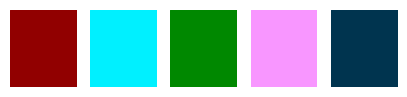

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from scipy.spatial.distance import cdist

def generate_perceptually_distinct_colors(n):
    # Generate a dense grid of colors in L*a*b* space
    L = np.linspace(20, 80, 10)   # Lightness range
    a = np.linspace(-80, 80, 20)  # a* color range
    b = np.linspace(-80, 80, 20)  # b* color range

    # Create a grid of all combinations of L, a, b values
    lab_grid = np.array(np.meshgrid(L, a, b)).T.reshape(-1, 3)

    # Initialize the list of chosen colors and start with a random color
    chosen_colors = [lab_grid[np.random.choice(len(lab_grid))]]

    # Iteratively select colors that maximize perceptual distance
    for _ in range(n - 1):
        # Compute distances from the chosen colors to all remaining candidates
        distances = cdist(chosen_colors, lab_grid, metric='euclidean')
        min_distances = distances.min(axis=0)
        
        # Choose the color with the maximum minimal distance to existing colors
        next_color = lab_grid[min_distances.argmax()]
        chosen_colors.append(next_color)

    # Convert chosen L*a*b* colors to RGB for visualization
    rgb_colors = color.lab2rgb(np.array(chosen_colors).reshape(1, -1, 3)).reshape(-1, 3)
    return rgb_colors

# Example usage with n levels
n_levels = 5
colors = generate_perceptually_distinct_colors(n_levels)

# Visualize the generated colors
fig, ax = plt.subplots(1, n_levels, figsize=(n_levels, 1))
for i in range(n_levels):
    ax[i].add_patch(plt.Rectangle((0, 0), 1, 1, color=colors[i]))
    ax[i].axis('off')
plt.show()

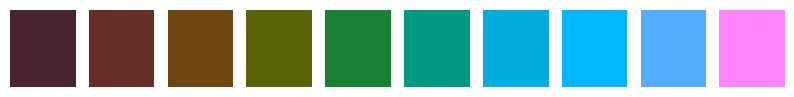

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

def generate_colors(n):
    # Generate points that are evenly spaced in a 3D space (L*a*b* color space)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    radius = np.linspace(20, 100, n)
    lightness = np.linspace(20, 80, n)
    
    # Convert spherical to cartesian coordinates
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)
    L = lightness
    
    # Stack the L*a*b* coordinates
    lab_colors = np.vstack((L, a, b)).T
    
    # Convert L*a*b* to RGB
    rgb_colors = color.lab2rgb(lab_colors.reshape(1, -1, 3)).reshape(-1, 3)
    
    return rgb_colors

# Example usage with n levels
n_levels = 10
colors = generate_colors(n_levels)

# Visualize the generated colors
fig, ax = plt.subplots(1, n_levels, figsize=(n_levels, 1))
for i in range(n_levels):
    ax[i].add_patch(plt.Rectangle((0, 0), 1, 1, color=colors[i]))
    ax[i].axis('off')
plt.show()